# Rotifer and Protozoa Object Detection Research Project
### Ryan Johnson

## Rotifer and Protozoa Object Detection (Multiple Label)

Using Roboflow and Yolov8 to create an object detection model for identifying these different types of microorganisms:

6 labels in total (Microorganisms)
* Paramecium
* Protozoa
* Rotifer
* Spirostomum
* Stentor
* Vorticella


Roboflow is an end-to-end computer vision platform that helps you
* collaborate with your team on computer vision projects
* collect & organize images
* understand and search unstructured image data
* annotate, and create datasets
* export, train, and deploy computer vision models
* use active learning to improve your dataset over time


**The dataset includes 2748 images.
Microorganisms are annotated in YOLOv8 format.**

The following pre-processing was applied to each image:
* Auto-orientation of pixel data (with EXIF-orientation stripping)
* Resize to 640x640 (Fit within)

The following augmentation was applied to create 3 versions of each source image:
* 50% probability of horizontal flip
* Random brightness adjustment of between -8 and +8 percent
* Random Gaussian blur of between 0 and 0.5 pixels

## Version 3

## Downloading Robowflow and Ultralytics version 8.0.196

In [1]:
!pip install roboflow
!pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1

### Have to use GPU
Checking to make use of GPU is being used

In [2]:
!nvidia-smi

Sun Aug 25 23:02:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from ultralytics import YOLO
from roboflow import Roboflow
import os
import random
from IPython.display import display, Image
from IPython import display

display.clear_output()

# import cv2 # OpenCV- computer vision

# checking to make sure that ultralytics setup is complete
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.7/201.2 GB disk)


# I Have to Downgrade Numpy to allow the module to work

A module that was compiled using NumPy 1.x cannot be run in NumPy 2.0.0 as it may crash. In order to support both 1.x and 2.x versions of NumPy, modules must be compiled with NumPy 2.0. Some modules may need to be rebuilt instead, e.g., with 'pybind11>=2.12'.
If you are a user of the module, the easiest solution will be to downgrade to 'numpy<2' or try to upgrade the affected module. We expect that some modules will need time to support NumPy 2.

In [4]:
import numpy as np
np.__version__

'1.26.4'

In [5]:
!pip install "numpy<2.0"

## Connecting Google Colab to Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# My 3rd version of the dataset I created with Roboflow for Yolov8 Rotifer and Protozoa Model


### **Note:** Because of the limited space on my Google Drive, I opted to import the model files instead by using a unique api_key that Roboflow created. It is in the hidden cell below.

In [7]:
#@title Version 3 of the Object Detection Model (using Roboflow to import data)

rf = Roboflow(api_key="jleFsz2VdsZFEDQDayOM")
project = rf.workspace("protozoa").project("protozoa_finder")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to protozoa_finder-3 in yolov8:: 100%|██████████| 5508/5508 [00:01<00:00, 3151.47it/s]


Helpful resource
- https://www.youtube.com/watch?v=LNwODJXcvt4

# Training yolov8 version 3
The accuracy improves with more runs (epochs) (using 100 epochs)

In [8]:
%%time
# Break down of Yolo steps for training

# detect - for object detection, train - training custom model, yolov8m - medium model, data: location of dataset, epochs: number of runs, imagez - is the size of the images (default is 640)
# !yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True
# can only use image size 640, 1080 causes errors

# Images that I am using are the size 640 x 640

!yolo task=detect \
mode=train model=yolov8m.pt \
data={dataset.location}/data.yaml \
epochs=100 \
imgsz=640 \
plots=True \
name= yolov8m_train_results_v3

100% 49.7M/49.7M [00:00<00:00, 81.2MB/s]
New https://pypi.org/project/ultralytics/8.2.82 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/protozoa_finder-3/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m_train_results_v3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, s

## Validation Training (best) Evaluation

In [9]:
# yolo detection model validation of the best trained model and the location of the data.yaml (with paths train, valid, and test paths)
!yolo task=detect mode=val model=/content/runs/detect/yolov8m_train_results_v3/weights/best.pt data={dataset.location}/data.yaml name= yolov8m_vaild_eval

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/protozoa_finder-3/valid/labels.cache... 228 images, 2 backgrounds, 0 corrupt: 100% 228/228 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 240, len(boxes) = 259. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:05<00:00,  2.64it/s]
                   all        228        259      0.914       0.92      0.932      0.749
            paramecium        228          7          1          1      0.995      0.894
              protozoa        228         27      0.857      0.556      0.669      0.377
               rotifer        228  

## Prediction Training (based on test images)

In [10]:
# detect model prediction training off of best model for the testing images
!yolo task=detect mode=predict model=/content/runs/detect/yolov8m_train_results_v3/weights/best.pt conf=0.5 source={dataset.location}/test/images name= yolov8m_pred

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs

image 1/124 /content/protozoa_finder-3/test/images/IMG_9553_mp4-0011_jpg.rf.c020383bf28a20399362bff566988264.jpg: 640x384 1 paramecium, 1 rotifer, 91.2ms
image 2/124 /content/protozoa_finder-3/test/images/IMG_9561_MOV-0006_jpg.rf.87ce737aa0f0e4f9b2945174f4a85277.jpg: 640x384 1 rotifer, 25.0ms
image 3/124 /content/protozoa_finder-3/test/images/IMG_9561_MOV-0011_jpg.rf.3a59c25bf9e8581cdf923f902a1da8bd.jpg: 640x384 1 protozoa, 1 rotifer, 24.9ms
image 4/124 /content/protozoa_finder-3/test/images/IMG_9561_MOV-0012_jpg.rf.68cebcf6dceb0eaffd892e6e26d67f18.jpg: 640x384 2 protozoas, 24.9ms
image 5/124 /content/protozoa_finder-3/test/images/IMG_9561_MOV-0014_jpg.rf.0ef9d547f1ab9df00b24f285ea4f529e.jpg: 640x384 1 rotifer, 24.9ms
image 6/124 /content/protozoa_finder-3/test/images/IMG_9561_MOV-0022_jpg.rf.4e8673e3d11c81e8cd9cfc5e87

# No Test Videos Used

When testing the model, I tried to use rotifer and protozoa videos to test how accurate and efficient the object detection would work, but it kept crashing. The video file was too big to handle, and I tried to make it smaller, but nothing worked. Instead, I used segments of the video that were split into images to test the object detection model. The images are stored in the test folder inside the protozoa_finder-3 folder.

**Note:** OpenCV kept crashing and giving me problems on both my local PC and Google Colab. I used test images instead.

# New and other Packages Needed for the Code Below

In [11]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

##### Helpful links:
- https://www.geeksforgeeks.org/os-path-module-python/
- https://www.javatpoint.com/os-walk-in-python
- https://www.geeksforgeeks.org/show-random-picture-from-a-folder-in-python/
- https://www.geeksforgeeks.org/how-to-iterate-through-images-in-a-folder-python/
- https://www.geeksforgeeks.org/python-os-path-join-method/
- https://www.kaggle.com/code/jiny333/tutorial-on-using-subplots-in-matplotlib
- https://www.geeksforgeeks.org/matplotlib-pyplot-imread-in-python/
- https://www.tutorialspoint.com/matplotlib/matplotlib_images.htm
- https://www.geeksforgeeks.org/enumerate-in-python/

# Displaying Multiple Random Images from a Folder
The function below runs through a specific folder path and collects a random amount of JPG image paths based on the user's input. Each of the random JPG image paths is then displayed based on the number of images the user inputs into the function.

The images shown are based on the predictions from the test images. If the total count of image paths is less than or equal to 6, then fig, axis matplotlib will be used. Then, if the image count is greater than 6, Image.open() will be used.


**Note:** I found it better to create a function for the code since I may use this code again for other folders.

In [40]:
# showing random images from a folder
def show_random_images(folder_path, num):

  # setting seed for random
  random.seed(10) # 10 # 3 # 5

  image_files = []
  # each list has all the image paths within the particular folder
  for img in os.listdir(folder_path):
    # find jpg images and append them to the list created (image_files)
    if img.lower().endswith('.jpg'):
      image_files.append(img)

  # print(image_files)

  if image_files:
    # selecting random images from the image_files
    num_random_images = num # 5 # number of images selected
    random_sample = random.sample(image_files, num_random_images) # getting random sampling

    # print(random_image) # ex: Spirostomum_2_MOV-0055_jpg.rf.8ef531367ea6190bfef74ea451913c20.jpg


    # creating the complete image path by joining folder path to the image
    #  with the complete image path the computer knowns where to find the image
    #   ex: /content/runs/detect/predict/rotifer_moving_2_MOV-0041_jpg.rf.72db1bca957bb85200b37f6d522a28c4.jpg
    full_image_path = []
    for image_name in random_sample:
      image_paths = os.path.join(folder_path, image_name) # creating full paths for each image
      full_image_path.append(image_paths)


    print(f'Paths: {full_image_path}\n')

  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------

  # Best ways to show image results
  # ------------------------------------------------------
  # for showing the predictions from the test images

  # if the image count is less than or equal to 6 than fig, axis matplotlib will be used

  # if the image count is greater than 6 that Image.open() will be used
  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------

  # if the image count is less than or equal to 6 than fig, axis matplotlib will be used
  # used len() instead of num makes it more efficient
  if len(full_image_path) <= 6:

    # creating subplots for images
    # num is the number of images selected and is needed for the subplots
    # figure size of the images
    fig, axes = plt.subplots(1, len(full_image_path), figsize=(24, 24))

    for img, lab in enumerate(full_image_path):
      image_path_rand = mpimg.imread(lab)
      axes[img].imshow(image_path_rand)
      axes[img].axis('off') # turning of axis

    plt.show()

  # if the image count is greater than 6 that Image.open() will be used
  # used len() instead of num makes it more efficient
  elif len(full_image_path) > 6:

    for image in full_image_path:

      # opening the image using Image
      image = Image.open(image)

      # display the image
      display(image)
      print()


# Showing a Number of the Predicted Images from Test Images

Paths: ['/content/runs/detect/yolov8m_pred/closeup_view_of_rotifer_MOV-0043_jpg.rf.04516b7fc48fa2cba8539c08acb498d8.jpg', '/content/runs/detect/yolov8m_pred/Spirostomum_3_MOV-0025_jpg.rf.7776e69c812f6f58f6a5ad6f87f56465.jpg', '/content/runs/detect/yolov8m_pred/close_rotifer_MOV-0002_jpg.rf.780b5b25cee3030042ff3d51432c494c.jpg', '/content/runs/detect/yolov8m_pred/Spirostomum_3_MOV-0189_jpg.rf.c0e416e0016e8949cb3bc957a98c4daa.jpg', '/content/runs/detect/yolov8m_pred/Spirostomum_1_MOV-0059_jpg.rf.357a31ac4735f0323c52353ad8d21453.jpg', '/content/runs/detect/yolov8m_pred/Spirostomum_3_MOV-0049_jpg.rf.351fe282b648ce7adcea80f70ff052cc.jpg']



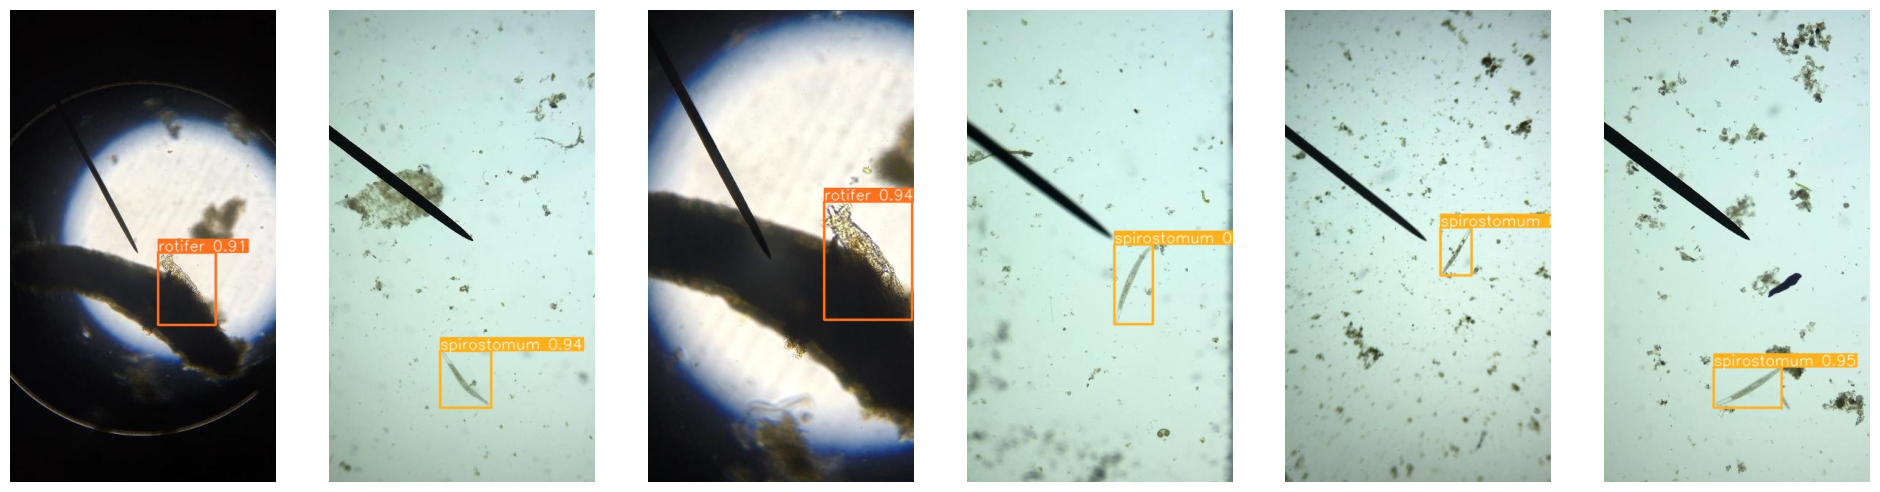

In [41]:
predict_folder_path = '/content/runs/detect/yolov8m_pred'
num_of_images = 6

show_random_images(predict_folder_path, num_of_images)

# Showing a Single Predicted Rotifer Image

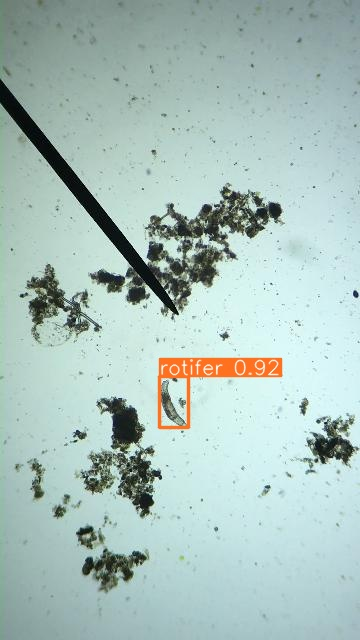

In [14]:
display(Image.open('/content/runs/detect/yolov8m_pred/Rotifer-moving-fast_MOV-0008_jpg.rf.c7cfc4c702ffae4e2baf11bb99e0a310.jpg'))

#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

A helpful resource for understanding the performance metrics: https://docs.ultralytics.com/guides/yolo-performance-metrics/  

# Training and Validation Results for the Rotifer and Protozoa Model

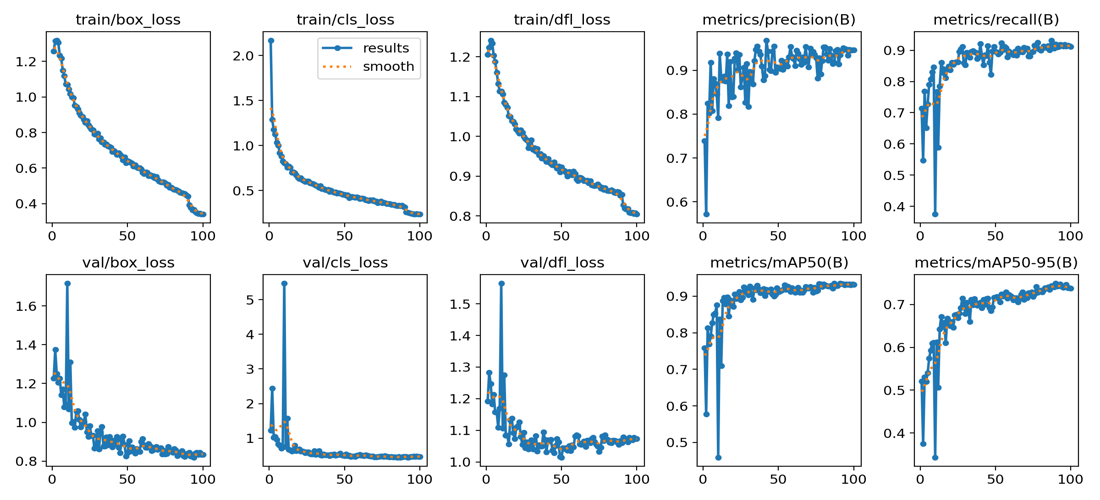

In [15]:
display(Image.open('/content/runs/detect/yolov8m_train_results_v3/results.png').resize((1100, 500)))

When looking at the training and validation results for the model, we see that both the validation and training losses start high with epochs at 0, and loss continues to decrease with more epochs trained with the final epoch at 100. The epochs represent how many training runs the model goes through. In conclusion, the result shows that the more training passes completed, the better the model is overall.

Then, when looking at the metrics precision, recall, mAP50, and mAP50-95 plots, each starts low but rapidly improves with more training epochs completed. The mAP50 and AP50-95 metrics both show an increase in efficiency throughout the training process. Then, precision and recall fluctuate between 80%, 90%, and 100% throughout the training process of the epochs. It shows that the more training passes completed, the better the results are overall.

# Trained Rotifer and Protozoa Model Results from (yolov8m_train_results_v3)

### Plotting the Classification Metrics
- Confusion Matrices
- Curves

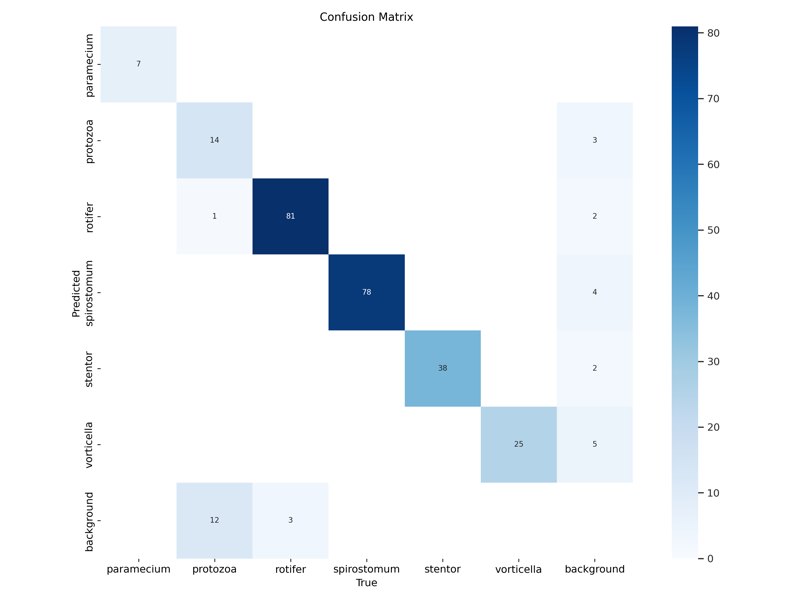

In [16]:
#                                                                                                 y,  x
display(Image.open('/content/runs/detect/yolov8m_train_results_v3/confusion_matrix.png').resize((800, 600)))

When looking at the confusion matrix, we see that most of the individual microorganisms are identified correctly. The microorganism, the Rotifer, was misclassified a single time, but overall, it was correctly predicted 80 times as the actual value Rotifer. Each microorganism has different numbers of predictions based on how many particular images were collected within the dataset. The Rotifer and the Spirostomum have large numbers because they have the most collected images.

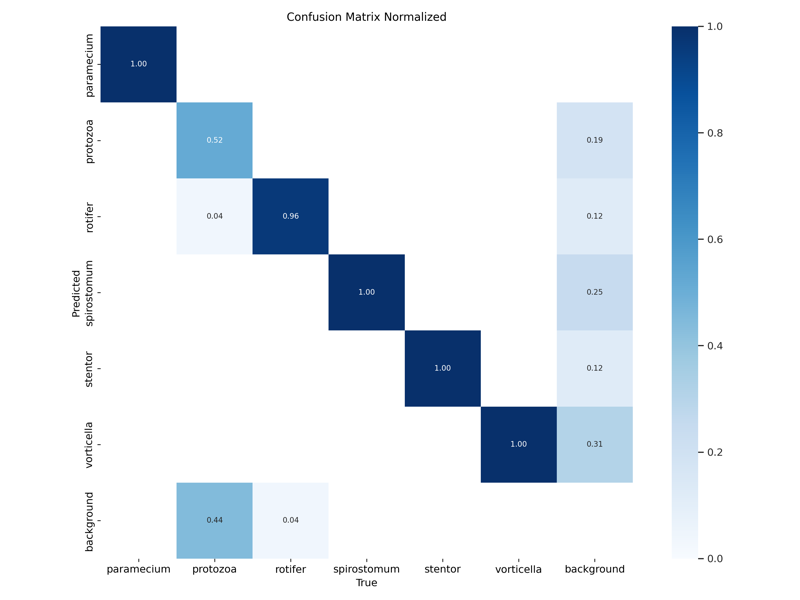

In [17]:
#                                                                                                            y,  x
display(Image.open('/content/runs/detect/yolov8m_train_results_v3/confusion_matrix_normalized.png').resize((800, 600)))

Then, looking at the normalized confusion matrix, we see the results are on the decimal scale and coincide with percentiles to determine how accurate the overall model is. Almost all the microorganisms predicted the correct actual value was near 100%, but the undetermined protozoa percentile is around 50%. There is one miss classification of the Rotifer, but overall, the matrix shows that the model performed excellently.

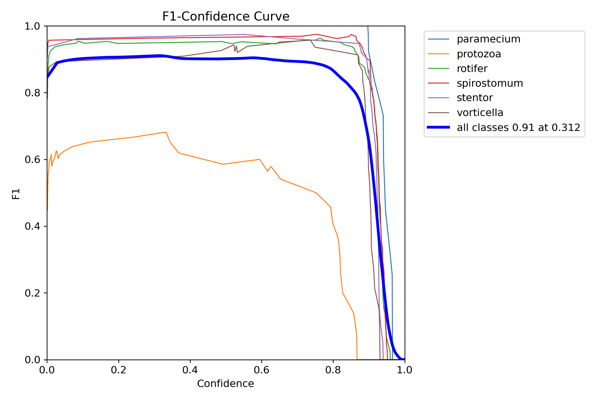

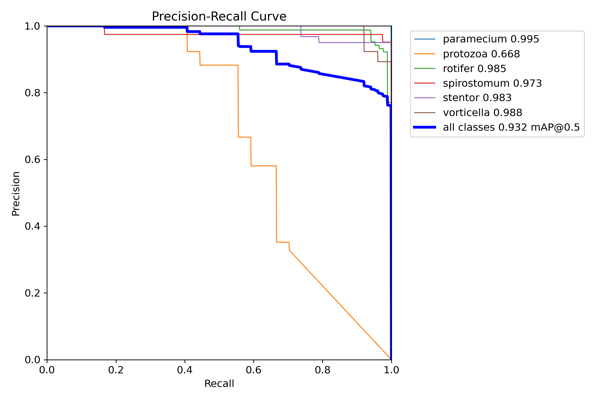

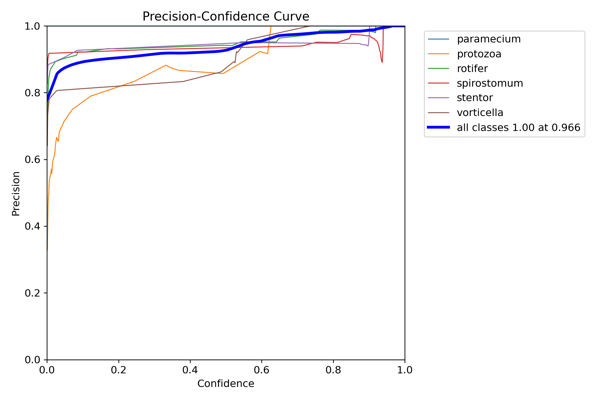

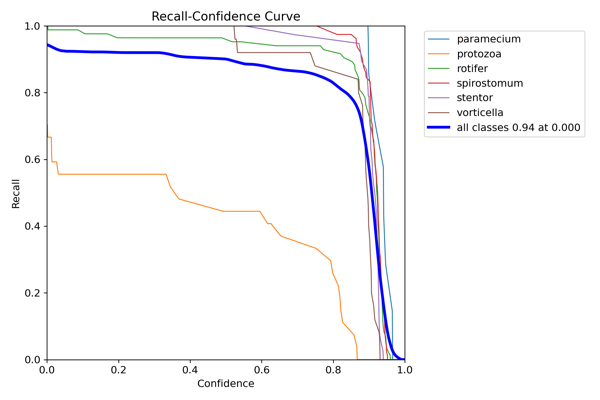

In [18]:
train_curve = ['/content/runs/detect/yolov8m_train_results_v3/F1_curve.png',
               '/content/runs/detect/yolov8m_train_results_v3/PR_curve.png',
               '/content/runs/detect/yolov8m_train_results_v3/P_curve.png',
               '/content/runs/detect/yolov8m_train_results_v3/R_curve.png']

for image in train_curve:

  # opening the image using Image
  image = Image.open(image).resize((600, 400))

  # display the image
  display(image)
  print()

Each curve has characteristics that help determine how well the model performed. They include the F1 Score, Precision-Recall, Precision, and Recall.
Almost all the microorganisms displayed in each of these curves performed well. The single unidentified protozoa is the only microorganism with the most fluctuation in all curves, indicating some uncertainty in the confidence of that particular microorganism. All the other microorganisms displayed in the curves have a high confidence rate, indicating that the overall model is successful.

#---------------------------------------------------------------------------------------------------------------------------------------------

# Validation Eval of Rotifer and Protozoa Model from (yolov8m_vaild_eval)

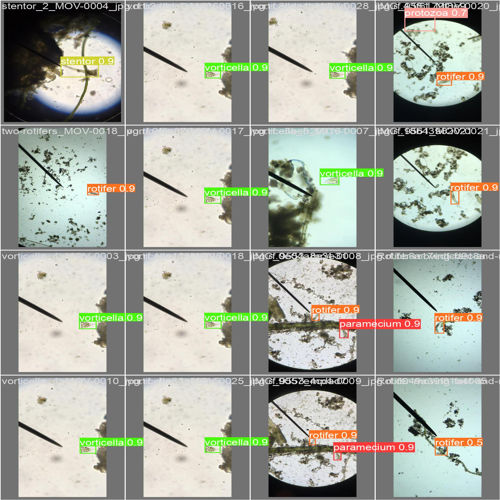

In [19]:
display(Image.open('/content/runs/detect/yolov8m_vaild_eval/val_batch0_pred.jpg').resize((500, 500)))

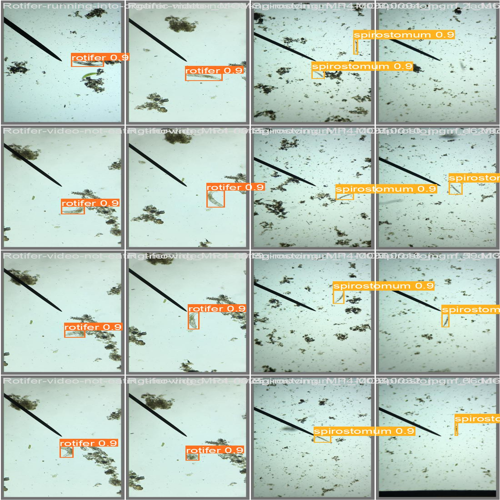

In [20]:
display(Image.open('/content/runs/detect/yolov8m_vaild_eval/val_batch2_pred.jpg').resize((500, 500)))

### Plotting the Classification Metrics
- Confusion Matrices
- Curves

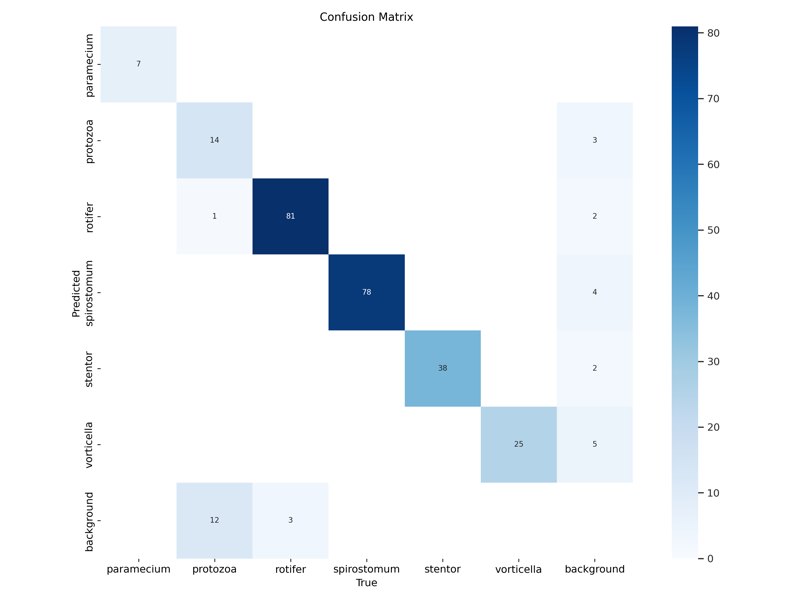

In [21]:
#                                                                                                 y,  x
display(Image.open('/content/runs/detect/yolov8m_vaild_eval/confusion_matrix.png').resize((800, 600)))

The confusion matrix for the validation evaluation model is slightly better than the training model. The Protozoa label has one more correctly identified microorganism than the training confusion matrix, but it is almost the same overall.

In the matrix, we see that most of the individual microorganisms are identified correctly. The microorganism, the Rotifer, was misclassified a single time, but overall, it was correctly predicted 80 times as the actual value Rotifer. Each microorganism has different numbers of predictions based on how many particular images were collected within the dataset. The Rotifer and the Spirostomum have large numbers because they have the most collected images.

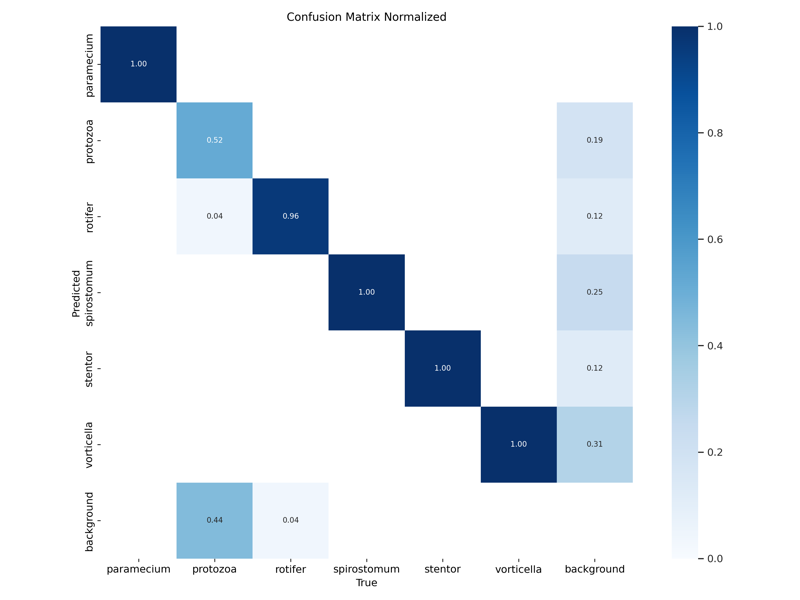

In [22]:
#                                                                                                            y,  x
display(Image.open('/content/runs/detect/yolov8m_vaild_eval/confusion_matrix_normalized.png').resize((800, 600)))

The normalized confusion matrix for the validation evaluation model is slightly better than the training model. The Protozoa label has a higher decimal percentage in identifying the microorganism than the training confusion matrix, but it is almost the same overall.

In the matrix, we see the results are on the decimal scale and coincide with percentiles to determine how accurate the overall model is. Almost all the microorganisms predicted the correct actual value was near 100%, but the undetermined protozoa percentile is around 50%. There is one miss classification of the Rotifer, but overall, the matrix shows that the model performed excellently.

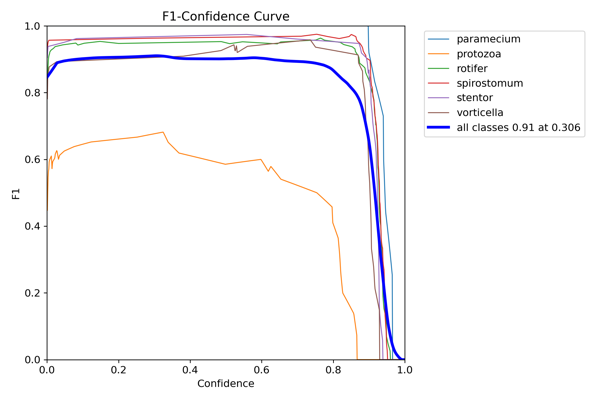

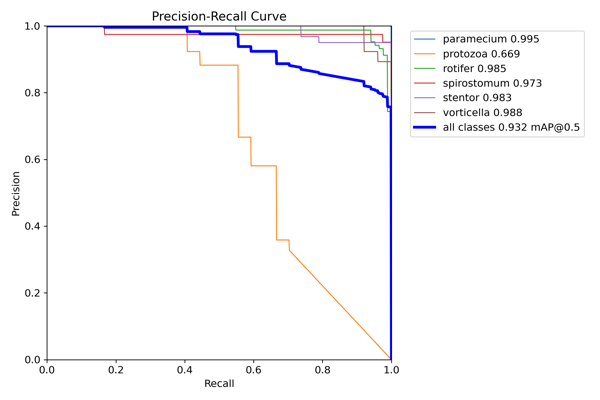

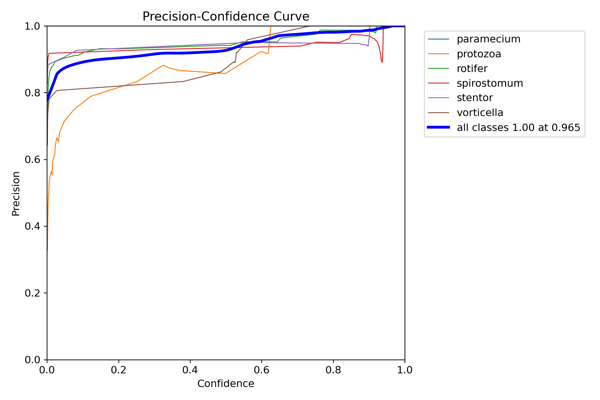

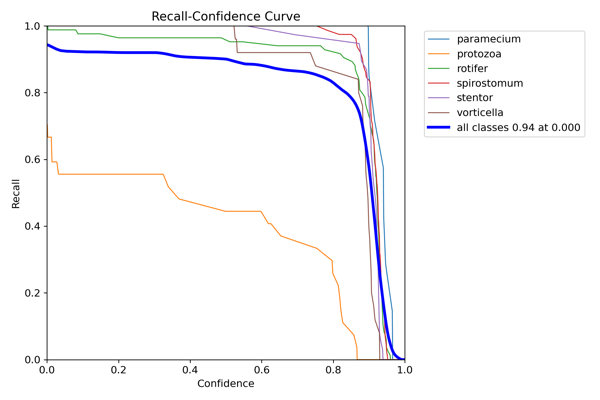

In [23]:
valid_curve = ['/content/runs/detect/yolov8m_vaild_eval/F1_curve.png',
               '/content/runs/detect/yolov8m_vaild_eval/PR_curve.png',
               '/content/runs/detect/yolov8m_vaild_eval/P_curve.png',
               '/content/runs/detect/yolov8m_vaild_eval/R_curve.png']

for image in valid_curve:

  # opening the image using Image
  image = Image.open(image).resize((600, 400))

  # display the image
  display(image)
  print()

The curves for the validation evaluation model are better on the third decimal place, known as the thousandth place. Other than that slight increase in each of the curves, overall, they are the same as the training models.

Each curve has characteristics that help determine how well the model performed. They include the F1 Score, Precision-Recall, Precision, and Recall.
Almost all the microorganisms displayed in each of these curves performed well. The single unidentified protozoa is the only microorganism with the most fluctuation in all curves, indicating some uncertainty in the confidence of that particular microorganism. All the other microorganisms displayed in the curves have a high confidence rate, indicating that the overall model is successful.

#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------

# Running the Best Trained Rotifer and Protozoa model for Single Images

In [24]:
# loading pretained model
protozoa_model = YOLO('/content/runs/detect/yolov8m_train_results_v3/weights/best.pt')

In [25]:
image_rest = protozoa_model(source="/content/runs/detect/yolov8m_pred/paramecium_MOV-0042_jpg.rf.599d5d2b755df5d85258a046b1056c4a.jpg",conf=0.5, save=True)


image 1/1 /content/runs/detect/yolov8m_pred/paramecium_MOV-0042_jpg.rf.599d5d2b755df5d85258a046b1056c4a.jpg: 640x384 1 paramecium, 80.1ms
Speed: 2.3ms preprocess, 80.1ms inference, 513.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict


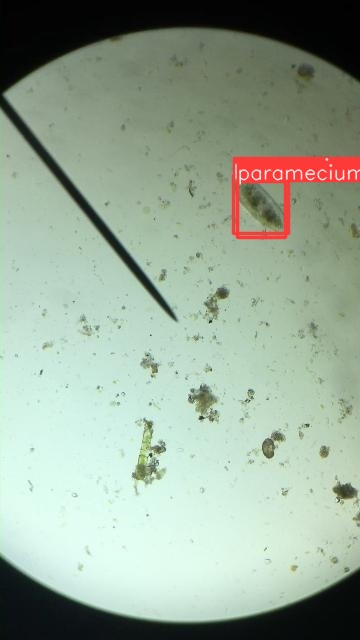

In [26]:
Image.open("/content/runs/detect/predict/paramecium_MOV-0042_jpg.rf.599d5d2b755df5d85258a046b1056c4a.jpg")

In [27]:
image_result = protozoa_model(source="/content/protozoa_finder-3/test/images/stentor_4_MOV-0016_jpg.rf.658d09dcedaee434439f73d3fb72a696.jpg",conf=0.8, save=True)


image 1/1 /content/protozoa_finder-3/test/images/stentor_4_MOV-0016_jpg.rf.658d09dcedaee434439f73d3fb72a696.jpg: 640x384 1 stentor, 25.0ms
Speed: 1.8ms preprocess, 25.0ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict


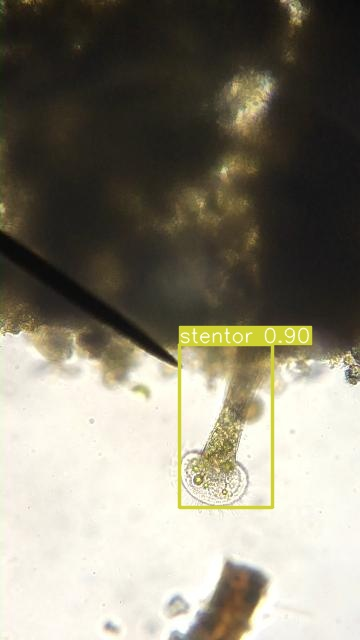

In [28]:
Image.open("/content/runs/detect/predict/stentor_4_MOV-0016_jpg.rf.658d09dcedaee434439f73d3fb72a696.jpg")
# Image("/content/runs/detect/predict/stentor_4_MOV-0016_jpg.rf.658d09dcedaee434439f73d3fb72a696.jpg")

In [29]:
# image_result

# Another way of testing the model with Multiple Test Images from a folder
Using the existing code from the function "show_random_images(folder_path, num)" and creating new functions to select images at random and show images in a folder. With these two new functions created, the best-trained model and the test images were to see how well it predicted different Rotifer and Protozoa.


### How the images will be Displayed
If the total count of image paths is less than or equal to 6, then fig, axis matplotlib will be used. Then, if the image count is greater than 6, Image.open() will be used.

### Selecting Random Images Paths from a Folder

In [30]:
# selecting only random images paths from a folder
def select_random_images(folder_path, num):

  # setting seed for random
  #random.seed(5) # 3 # 5

  image_files = []
  # each list has all the image paths within the particular folder
  for img in os.listdir(folder_path):
    # find jpg images and append them to the list created (image_files)
    if img.lower().endswith('.jpg'):
      image_files.append(img)

  # print(image_files)

  if image_files:
    # selecting random images from the image_files
    num_random_images = num # 5 # number of images selected
    random_sample = random.sample(image_files, num_random_images) # getting random sampling

    # print(random_image) # ex: Spirostomum_2_MOV-0055_jpg.rf.8ef531367ea6190bfef74ea451913c20.jpg


    # creating the complete image path by joining folder path to the image
    #  with the complete image path the computer knowns where to find the image
    #   ex: /content/runs/detect/predict/rotifer_moving_2_MOV-0041_jpg.rf.72db1bca957bb85200b37f6d522a28c4.jpg
    full_image_path = []
    for image_name in random_sample:
      image_paths = os.path.join(folder_path, image_name) # creating full paths for each image
      full_image_path.append(image_paths)


  #print(full_image_path)
  return full_image_path

### Show Selected Images Paths from a Folder

In [31]:
# show images from a folder
def show_images_from_folder(folder_path):

  image_files = []
  # each list has all the image paths within the particular folder
  for img in os.listdir(folder_path):
    # find jpg images and append them to the list created (image_files)
    if img.lower().endswith('.jpg'):
      image_files.append(img)

  # print(image_files)

    # creating the complete image path by joining folder path to the image
    #  with the complete image path the computer knowns where to find the image
    #   ex: /content/runs/detect/predict/rotifer_moving_2_MOV-0041_jpg.rf.72db1bca957bb85200b37f6d522a28c4.jpg
    full_image_path = []
    for image_name in image_files:
      image_paths = os.path.join(folder_path, image_name) # creating full paths for each image
      full_image_path.append(image_paths)


      #print(full_image_path)

  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------

  # Best ways to show image results
  # ------------------------------------------------------
  # for showing the predictions from the test images

  # if the image count is less than or equal to 6 than fig, axis matplotlib will be used

  # if the image count is greater than 6 that Image.open() will be used
  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------
  # ---------------------------------------------------------------------------------------

  # if the image count is less than or equal to 6 than fig, axis matplotlib will be used
  # used len() instead of num makes it more efficient
  if len(full_image_path) <= 6:

    # creating subplots for images
    # num is the number of images selected and is needed for the subplots
    # figure size of the images
    fig, axes = plt.subplots(1, len(full_image_path), figsize=(24, 24))

    for img, lab in enumerate(full_image_path):
      image_path_rand = mpimg.imread(lab)
      axes[img].imshow(image_path_rand)
      axes[img].axis('off') # turning of axis

    plt.show()

  # if the image count is greater than 6 that Image.open() will be used
  # used len() instead of num makes it more efficient
  elif len(full_image_path) > 6:

    for image in full_image_path:

      # opening the image using Image
      image = Image.open(image)

      # display the image
      display(image)
      print()


In [32]:
image_folder_path = '/content/protozoa_finder-3/test/images'
new_num = 6

path = select_random_images(image_folder_path, new_num)
print(path)

['/content/protozoa_finder-3/test/images/stentor_4_MOV-0016_jpg.rf.658d09dcedaee434439f73d3fb72a696.jpg', '/content/protozoa_finder-3/test/images/stentor_vorticella_MOV-0002_jpg.rf.65581bd8fd3d5517e49d78f992ccc988.jpg', '/content/protozoa_finder-3/test/images/small_protozoa_2_MOV-0025_jpg.rf.62626f77e65bd8e702d21e4a0796ab90.jpg', '/content/protozoa_finder-3/test/images/rotifer_moving_2_MOV-0007_jpg.rf.bba9087d2dd16a1db3bf878223fa2fa8.jpg', '/content/protozoa_finder-3/test/images/Rotifer-one-than-two_MOV-0019_jpg.rf.67be66878f90eca3f468fff4537032f6.jpg', '/content/protozoa_finder-3/test/images/Spirostomum_1_MOV-0059_jpg.rf.357a31ac4735f0323c52353ad8d21453.jpg']


In [33]:
# loading pretained model
protozoa_model = YOLO('/content/runs/detect/yolov8m_train_results_v3/weights/best.pt')

protozoa_image_results = protozoa_model(source= path,conf=0.5, save=True, name='pred_prot_images')


0: 640x384 1 stentor, 1: 640x384 3 stentors, 2: 640x384 2 protozoas, 3: 640x384 1 rotifer, 4: 640x384 (no detections), 5: 640x384 1 spirostomum, 110.2ms
Speed: 1.0ms preprocess, 18.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/pred_prot_images


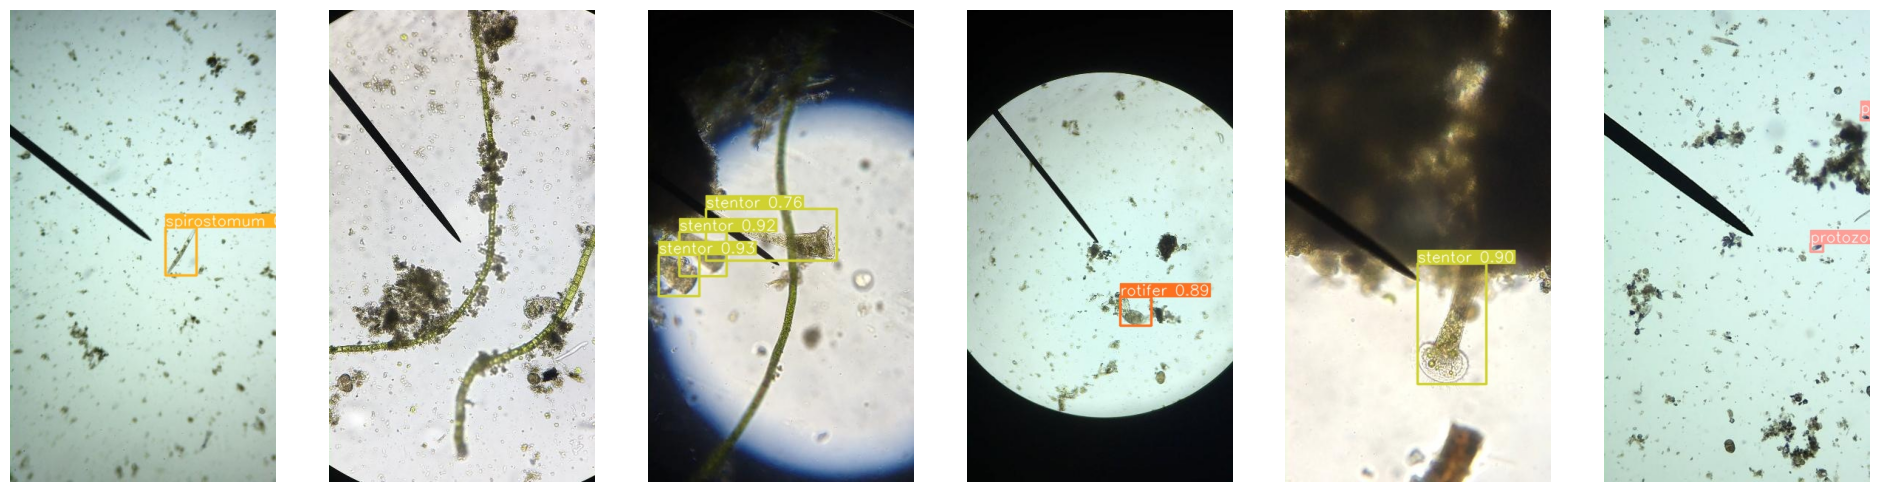

In [34]:
protozoa_model_pred_images_path = '/content/runs/detect/pred_prot_images'

show_images_from_folder(protozoa_model_pred_images_path)

# Prediction and Classification of a Rotifer from a New Test Image
#### (Using the Path of an uploaded image from Google Drive)

## NO Training used (using the original model)

In [35]:
p_model_3 = project.version(3).model # model from roboflow

# pred= r_model.predict("/content/drive/MyDrive/datasets/rotifer.png", confidence=80, overlap=50)

# image_input = input("Please upload image path from Google Drive: ")

image_input = "/content/drive/MyDrive/datasets/rotifer.png"

pred= p_model_3.predict(image_input, confidence=80, overlap=20)

In [36]:
pred.json()

{'predictions': [{'x': 610,
   'y': 292,
   'width': 121,
   'height': 215,
   'confidence': 0.8118276596069336,
   'class': 'rotifer',
   'class_id': 2,
   'detection_id': '92078c92-c068-4870-b7dc-4739c9c3b5c2',
   'image_path': '/content/drive/MyDrive/datasets/rotifer.png',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '864', 'height': '710'}}

In [37]:
pred.save("/content/drive/MyDrive/datasets/prediction_protozoa.jpg") # save prediction of a rotifer based on the training model

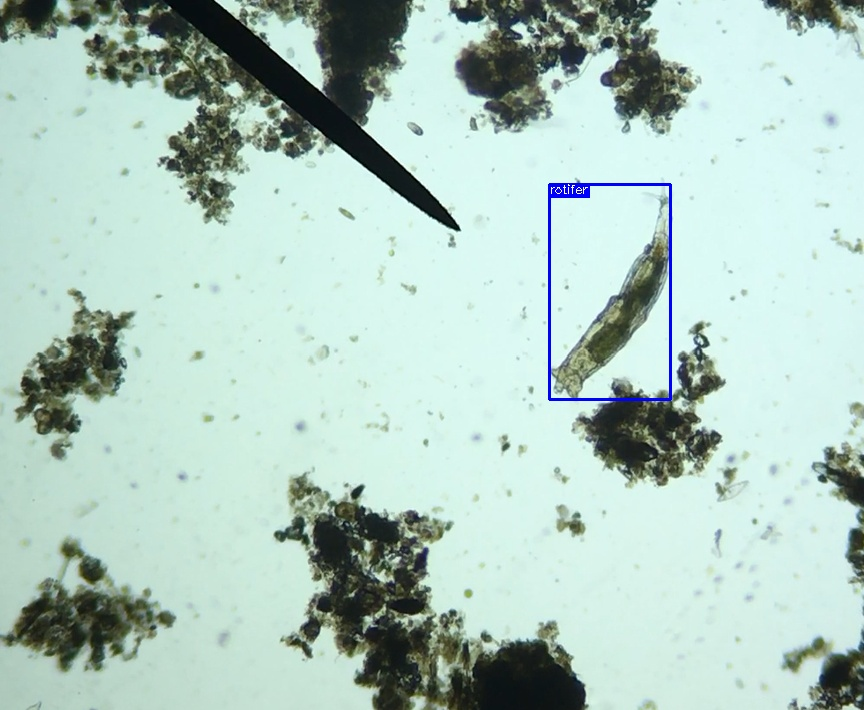

In [38]:
# Image("/content/drive/MyDrive/datasets/prediction_protozoa.jpg", width=700)
display(Image.open("/content/drive/MyDrive/datasets/prediction_protozoa.jpg"))# image of rotifer and prediction

# Converting .ipynb file to HTML

In [42]:
%%capture
import time
time.sleep(10)
!jupyter nbconvert --to html /content/drive/MyDrive/Rotifer_and_Protozoa_training_yolov8_version3.ipynb